보통의 거래량회전율은 연간으로 계산하므로 1년의 입회일수(약 300)를 곱해주는 (일일 거래량 * 입회일수) / 상장 주식 수의 평균 의 공식으로 계산하는데, 우리는 일일 거래량회전율이 필요하므로 (일일 거래량의 총합 / 상장 주식 수의 평균)로 계산함. 또한, 개별 주식의 거래량회전율이 아닌 KTOP30의 거래량 회전율을 구해야 하므로 (30개 종목의 총 거래량 / 30개 종목의 총 상장 주식 수의 평균)으로 공식을 변형한다. 회전율 100%의 의미는 상장주식총수가 연간 1회전하는 것을 의미한다. 과거의 검증으로 볼때 50%를 기준으로 130%이상이 단기경계, 20%수준이면 바닥으로 본다

In [28]:
from pykrx import stock
import pandas as pd
import numpy as np
import datetime

In [24]:
codes = pd.read_excel('KODEX_KTOP_30_20220629.xlsx',header=2).drop(0,axis=0)
codes = list(codes['종목코드'])

In [87]:
start_date = "20200601"
end_date = "20220630"

df = stock.get_market_ohlcv(start_date, end_date, '005930').reset_index()[['날짜', '거래량']]
df['거래량'] = 0 # 빈공간 생성

for code in codes:
    df['거래량'] += stock.get_market_ohlcv(start_date, end_date, code)['거래량'].values
df

,날짜,거래량
0,2020-06-01,52101756
1,2020-06-02,55702080
2,2020-06-03,120676283
3,2020-06-04,98610055
4,2020-06-05,62517160
...,...,...
511,2022-06-24,43813091
512,2022-06-27,37949347
513,2022-06-28,31048533
514,2022-06-29,37038618


In [34]:
start = datetime.datetime.strptime(start_date, "%Y%m%d")
end = datetime.datetime.strptime(end_date, "%Y%m%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days + 1)]
date_generated

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0),
 datetime.datetime(2020, 6, 4, 0, 0),
 datetime.datetime(2020, 6, 5, 0, 0),
 datetime.datetime(2020, 6, 6, 0, 0),
 datetime.datetime(2020, 6, 7, 0, 0),
 datetime.datetime(2020, 6, 8, 0, 0),
 datetime.datetime(2020, 6, 9, 0, 0),
 datetime.datetime(2020, 6, 10, 0, 0),
 datetime.datetime(2020, 6, 11, 0, 0),
 datetime.datetime(2020, 6, 12, 0, 0),
 datetime.datetime(2020, 6, 13, 0, 0),
 datetime.datetime(2020, 6, 14, 0, 0),
 datetime.datetime(2020, 6, 15, 0, 0),
 datetime.datetime(2020, 6, 16, 0, 0),
 datetime.datetime(2020, 6, 17, 0, 0),
 datetime.datetime(2020, 6, 18, 0, 0),
 datetime.datetime(2020, 6, 19, 0, 0),
 datetime.datetime(2020, 6, 20, 0, 0),
 datetime.datetime(2020, 6, 21, 0, 0),
 datetime.datetime(2020, 6, 22, 0, 0),
 datetime.datetime(2020, 6, 23, 0, 0),
 datetime.datetime(2020, 6, 24, 0, 0),
 datetime.datetime(2020, 6, 25, 0, 0),
 datetime.datetime(2020, 6, 26, 0,

In [50]:
stocks = []
for date in date_generated:
    date = datetime.datetime.strftime(date, "%Y%m%d")
    df2 = stock.get_market_cap(date)
    if df2['종가'].iloc[0] == 0:
        continue
    stocks.append(sum(df2.loc[codes, '상장주식수']))
len(stocks)

516

In [88]:
df['거래량'] = round((df['거래량'] * 30) / stocks, 5)
deno = max(df['거래량']) - min(df['거래량'])
df['거래량'] = (df['거래량'] - min(df['거래량'])) / deno
df

,날짜,거래량
0,2020-06-01,0.157179
1,2020-06-02,0.175729
2,2020-06-03,0.510493
3,2020-06-04,0.396797
4,2020-06-05,0.210836
...,...,...
511,2022-06-24,0.105031
512,2022-06-27,0.076075
513,2022-06-28,0.042012
514,2022-06-29,0.071587


In [90]:
np.median(df['거래량'])

0.11801969090311223

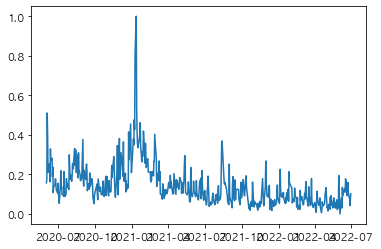

In [89]:
import matplotlib.pyplot as plt

plt.plot(df['날짜'], df['거래량'])